In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification

Using TensorFlow backend.


In [5]:
samples = pd.read_csv("sample_list.csv",sep=';') #load sample list
df = pd.DataFrame(samples)
samples_df = df[['Sample', 'Disease']]
samples_df.head()

,Sample,Disease
0,Sample_0001_Non-LCa,Non-LCa
1,Sample_0002_Non-LCa,Non-LCa
2,Sample_0003_LCa,LCa
3,Sample_0004_Non-LCa,Non-LCa
4,Sample_0005_Non-LCa,Non-LCa


In [6]:
mirnas = pd.read_csv("norm_data__non_log.txt",sep='\t') #load miRNAs

In [7]:
mirnas.head()

,Sample_0001_Non-LCa,Sample_0002_Non-LCa,Sample_0003_LCa,Sample_0004_Non-LCa,Sample_0005_Non-LCa,Sample_0006_Non-LCa,Sample_0007_Non-LCa,Sample_0008_Non-LCa,Sample_0009_Non-LCa,Sample_0010_Non-LCa,...,Sample_3037_Non-LCa,Sample_3038_Non-LCa,Sample_3039_Non-LCa,Sample_3040_Non-LCa,Sample_3041_Non-LCa,Sample_3042_Non-LCa,Sample_3043_LCa,Sample_3044_Non-LCa,Sample_3045_Non-LCa,Sample_3046_Non-LCa
feature-0001,8.500863,9.941665,8.468764,8.519110,7.695362,8.511572,9.806796,8.111616,7.452919,7.578256,...,8.393852,9.336868,8.825555,11.023160,7.890167,8.842462,6.860710,7.650270,7.415795,7.797602
feature-0002,8.001125,8.064157,7.945632,7.428407,7.969229,7.596385,7.350761,7.766351,7.596385,7.501078,...,7.974236,7.603061,7.046157,7.239167,7.988912,8.037061,8.251054,7.385154,7.998785,8.003537
feature-0003,28.747845,15.727566,35.426976,13.942995,33.991915,36.450612,7.784135,28.747845,62.300418,16.526670,...,35.426976,43.689084,38.073203,15.543100,34.456610,38.622678,43.689084,59.966780,89.553106,30.980816
feature-0004,9.941665,12.098506,10.311829,14.085761,11.822439,10.815340,23.271599,9.806796,10.024888,10.592802,...,9.100630,12.870063,11.323305,12.442595,12.293139,9.982537,11.171948,9.469426,8.069276,9.842943
feature-0005,7.589673,8.853987,7.648110,8.174631,8.940175,8.519110,9.304344,7.806593,9.084872,9.038317,...,7.589673,8.565147,8.245406,8.203915,7.315470,8.342968,8.871970,7.269378,8.448181,7.764134


In [8]:
mirnas_df=mirnas.T

In [9]:
mirnas_df.head()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1174,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183
Sample_0001_Non-LCa,8.500863,8.001125,28.747845,9.941665,7.589673,8.679772,7.804306,13.542269,7.080440,21.135280,...,7.713066,7.652475,7.600870,9.076837,7.395667,85.931773,303.242753,8.960097,12.928830,8.549728
Sample_0002_Non-LCa,9.941665,8.064157,15.727566,12.098506,8.853987,9.100630,8.214993,13.105117,6.445316,14.939257,...,7.312545,6.763480,7.455388,8.444764,7.232966,73.140879,179.976799,8.814242,19.714151,8.259411
Sample_0003_LCa,8.468764,7.945632,35.426976,10.311829,7.648110,8.761466,7.772970,16.314979,7.489190,27.411820,...,7.750865,7.326394,7.757589,8.493571,9.578714,30.190762,175.608275,8.084079,11.171948,8.751308
Sample_0004_Non-LCa,8.519110,7.428407,13.942995,14.085761,8.174631,8.049387,8.358423,12.596805,7.715340,21.532998,...,8.327567,7.860627,8.256623,9.406866,8.393852,20.942159,269.352082,8.410467,9.382674,8.185181
Sample_0005_Non-LCa,7.695362,7.969229,33.991915,11.822439,8.940175,8.101449,7.306996,9.092907,6.889294,39.199841,...,7.675295,8.303378,7.450536,11.606221,10.392308,18.084913,367.711493,7.670650,11.869036,13.737306


In [10]:
mirnas_df1 = mirnas_df.iloc[:,0:1183]  #selecting column from miRNS

In [11]:
samples_df.head()

,Sample,Disease
0,Sample_0001_Non-LCa,Non-LCa
1,Sample_0002_Non-LCa,Non-LCa
2,Sample_0003_LCa,LCa
3,Sample_0004_Non-LCa,Non-LCa
4,Sample_0005_Non-LCa,Non-LCa


In [12]:
samples_df1 = samples_df.iloc[:,-1] #output column

In [13]:
samples_df1.head()

0    Non-LCa
1    Non-LCa
2        LCa
3    Non-LCa
4    Non-LCa
Name: Disease, dtype: object

         Univariate Selection

          Features         Score
861   feature-0862  2.298243e+06
60    feature-0061  2.224120e+06
572   feature-0573  1.708709e+06
855   feature-0856  1.082321e+06
1135  feature-1136  7.871919e+05
461   feature-0462  6.237259e+05
852   feature-0853  5.698531e+05
1072  feature-1073  5.691676e+05
1047  feature-1048  4.934103e+05
532   feature-0533  4.792379e+05
272   feature-0273  4.258282e+05
1157  feature-1158  4.255120e+05
299   feature-0300  3.632446e+05
869   feature-0870  3.625550e+05
1087  feature-1088  3.595284e+05
28    feature-0029  3.129633e+05
432   feature-0433  2.968598e+05
597   feature-0598  2.713446e+05
975   feature-0976  2.709437e+05
696   feature-0697  2.681633e+05
366   feature-0367  2.628777e+05
410   feature-0411  2.616452e+05
811   feature-0812  2.543454e+05
1171  feature-1172  2.513917e+05
47    feature-0048  2.440689e+05
615   feature-0616  2.429623e+05
349   feature-0350  2.322512e+05
509   feature-0510  2.288162e+05
693   featur

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00096235 0.00074998 0.00038877 ... 0.000103   0.00056078 0.00115743]


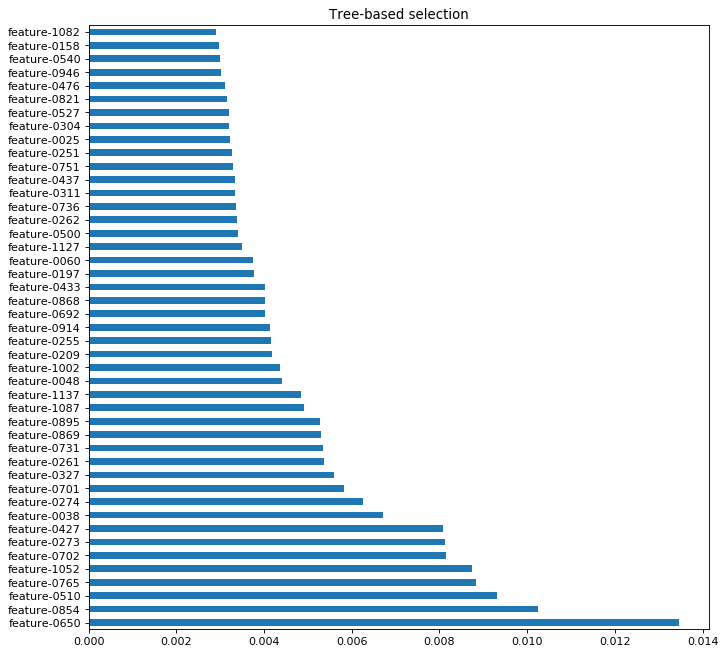

In [14]:
#Univariate feature selection
#apply SelectKBest
select_feature = SelectKBest(score_func=chi2, k=30)
fit = select_feature.fit(mirnas_df1,samples_df1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(mirnas_df1.columns)
#concat two dataframes for better visualization 
Scores = pd.concat([dfcolumns,dfscores],axis=1)
Scores.columns = ['Features','Score']
#print best 30 features with scores
print('         Univariate Selection')
print('')
print(Scores.nlargest(42,'Score')) 


#Tree-based selection
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
Fimp_model = ExtraTreesClassifier()
Fimp_model.fit(mirnas_df1,samples_df1)
print(Fimp_model.feature_importances_) 
feat_imp = pd.Series(Fimp_model.feature_importances_, index=mirnas_df1.columns)
feat_imp.nlargest(45).plot(kind='barh')
plt.title('Tree-based selection')
plt.show()

In [15]:
#Univariate Selection
mirnas_final = mirnas_df.iloc[:,[861,60,572,855,1135,461,852,1072,1047,532,272, 1157,299,869,1087,28,432,597,975,696,366,410,811,1171,47,615,349,509,693,56,966,30,281,499,350,303,578,429,625,326,763,157]]

#Tree-based selection
mirnas_final2 = mirnas_df.iloc[:,[386,867,977,575,310,273,1072,700,196,113, 897,37,272,208,1179,693,260,432,157,894,299,620,1171,1157,548,723,966,853,1136]]

In [16]:
samples_df.head()

,Sample,Disease
0,Sample_0001_Non-LCa,Non-LCa
1,Sample_0002_Non-LCa,Non-LCa
2,Sample_0003_LCa,LCa
3,Sample_0004_Non-LCa,Non-LCa
4,Sample_0005_Non-LCa,Non-LCa


In [17]:
#Univariate Selection
#merging dataset with label
mirnas_final['sort'] = np.arange(len(mirnas_final))
samples_df['sort'] = np.arange(len(samples_df))
tumor = pd.merge(mirnas_final, samples_df, on='sort')
tumor=tumor.drop(['sort', 'Sample'], axis=1)
tumor

C:\Users\Koushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Koushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,feature-0862,feature-0061,feature-0573,feature-0856,feature-1136,feature-0462,feature-0853,feature-1073,feature-1048,feature-0533,...,feature-0500,feature-0351,feature-0304,feature-0579,feature-0430,feature-0626,feature-0327,feature-0764,feature-0158,Disease
0,41952.033256,421.616343,9.671268,22.376270,1836.073925,240.164605,97451.08,51566.010063,1117.701164,2030.985635,...,7740.069116,1218.673358,15579.718505,9.655523,232198.513653,3215.213719,901.800469,5192.811965,6759.712211,Non-LCa
1,51566.010063,487.995814,14.304751,31.784270,1520.100091,167.063007,78654.36,64155.516126,1166.319710,1667.738585,...,14023.704006,730.608008,30177.155110,19.229412,232198.513653,2139.988055,2842.786346,19451.763434,12797.198194,Non-LCa
2,78654.362393,233.496656,12.392570,21.135280,2030.985635,87.753678,41952.03,97451.082712,1667.738585,1836.073925,...,11776.639233,5923.636705,7236.077341,12.985236,232198.513653,1070.924591,5545.812159,19451.763434,17426.343930,LCa
3,97451.082712,526.530771,12.814078,45.105766,4852.047676,303.242753,64155.52,78654.362393,3215.213719,4537.804180,...,8877.773221,2252.991761,15579.718505,10.716389,232198.513653,1331.192179,3017.031921,9512.632516,10899.865321,Non-LCa
4,64155.516126,144.962771,10.918152,38.622678,1931.978959,70.232501,51566.01,97451.082712,1391.284040,1454.212060,...,14023.704006,3215.213719,10899.865321,14.857046,232198.513653,437.027508,4852.047676,19451.763434,15579.718505,Non-LCa
5,25172.328277,221.166944,12.442595,24.519648,3662.829238,95.204660,78654.36,51566.010063,2675.909520,3017.031921,...,8877.773221,618.348622,21787.992147,11.915735,232198.513653,1218.673358,1272.846143,9512.632516,7236.077341,Non-LCa
6,51566.010063,2252.991761,16.013722,101.531000,15579.718505,526.530771,97451.08,78654.362393,10899.865321,17426.343930,...,5923.636705,1331.192179,1070.924591,138.532377,152399.215113,3017.031921,2381.824951,64155.516126,4537.804180,Non-LCa
7,51566.010063,303.242753,10.504247,24.788253,2381.824951,108.317860,64155.52,78654.362393,1589.539734,2528.247157,...,8308.734807,2842.786346,15579.718505,12.596805,232198.513653,1750.457384,1272.846143,10899.865321,6332.113000,Non-LCa
8,41952.033256,141.838948,9.736289,17.319737,2528.247157,74.636343,64155.52,78654.362393,1750.457384,2139.988055,...,5192.811965,3426.570911,21787.992147,11.522974,232198.513653,526.530771,1667.738585,4852.047676,7740.069116,Non-LCa
9,41952.033256,159.191944,10.883412,16.422761,3662.829238,91.402416,64155.52,78654.362393,2528.247157,3215.213719,...,6332.113000,1667.738585,17426.343930,11.822439,232198.513653,618.348622,1166.319710,19451.763434,6759.712211,Non-LCa


In [18]:
#Tree-based selection
#merging dataset with label
mirnas_final2['sort'] = np.arange(len(mirnas_final2))
samples_df['sort'] = np.arange(len(samples_df))
tumor2 = pd.merge(mirnas_final2, samples_df, on='sort')
tumor2=tumor2.drop(['sort', 'Sample'], axis=1)
tumor2

C:\Users\Koushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Koushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,feature-0387,feature-0868,feature-0978,feature-0576,feature-0311,feature-0274,feature-1073,feature-0701,feature-0197,feature-0114,...,feature-0300,feature-0621,feature-1172,feature-1158,feature-0549,feature-0724,feature-0967,feature-0854,feature-1137,Disease
0,7.146528,194.08420,570.759918,123.477449,333.518499,30.980816,51566.010063,14.537191,863.312891,7.536709,...,3426.570911,8.242657,10899.865321,1331.192179,1454.212060,52.624270,4537.804180,7.374916,2842.786346,Non-LCa
1,7.301303,254.38630,344.643818,294.429095,643.661923,33.991915,64155.516126,9.371361,333.518499,7.477311,...,10181.488322,8.248260,4537.804180,7236.077341,4221.131360,126.322154,6759.712211,7.304179,2528.247157,Non-LCa
2,7.393043,406.81750,699.243150,254.386329,2381.824951,39.795825,97451.082712,20.942159,344.643818,8.486458,...,5192.811965,19.387335,6759.712211,9512.632516,3017.031921,204.279359,14023.704006,9.076837,21787.992147,LCa
3,7.887826,240.16460,593.611671,64.778140,1218.673358,33.526791,78654.362393,14.939257,285.644299,7.704209,...,2528.247157,10.504247,6759.712211,6332.113000,2381.824951,82.573232,8308.734807,7.927178,7236.077341,Non-LCa
4,7.735078,548.53820,699.243150,198.980660,1272.846143,39.795825,97451.082712,34.939524,570.759918,11.134332,...,9512.632516,17.948742,6332.113000,6759.712211,3426.570911,240.164605,21787.992147,10.419474,8308.734807,Non-LCa
5,7.306996,392.83750,828.206379,175.608275,194.084203,55.550968,51566.010063,36.976892,643.661923,12.596805,...,6332.113000,18.488887,2381.824951,2252.991761,1520.100091,85.931773,5192.811965,7.286962,2842.786346,Non-LCa
6,7.146528,23.75662,105.986607,42.994266,470.136340,35.937839,78654.362393,8.324640,215.350500,6.889294,...,3662.829238,18.488887,4852.047676,2675.909520,2528.247157,12.293139,21787.992147,6.829100,12797.198194,Non-LCa
7,7.585175,285.64430,943.273473,73.140879,1026.768110,42.994266,78654.362393,30.190762,406.817521,8.158548,...,3215.213719,11.961249,6759.712211,3426.570911,1931.978959,93.232516,11776.639233,6.784239,5923.636705,Non-LCa
8,7.257408,618.34860,730.608008,167.063007,1166.319710,27.738883,78654.362393,26.187105,470.136340,9.008083,...,4537.804180,13.737306,9512.632516,4221.131360,1520.100091,129.344959,8308.734807,8.648979,5923.636705,Non-LCa
9,7.735078,593.61170,487.995814,135.366272,643.661923,18.929496,78654.362393,28.405968,526.530771,9.108765,...,8877.773221,16.635275,7740.069116,7236.077341,670.918724,126.322154,12797.198194,8.321563,5923.636705,Non-LCa


In [19]:
#Univariate Selection
Disease = {'Non-LCa': 1,'LCa': 0}
tumor.Disease = [Disease[item] for item in tumor.Disease]

#Tree-based selection
Disease = {'Non-LCa': 1,'LCa': 0}
tumor2.Disease = [Disease[item] for item in tumor2.Disease]

In [20]:
#Univariate Selection
X_train, X_test, y_train, y_test = train_test_split(tumor.loc[:, tumor.columns != 'Disease'], tumor['Disease'], stratify=tumor['Disease'], random_state=50)

#Tree-based selection
X_train2, X_test2, y_train2, y_test2 = train_test_split(tumor2.loc[:, tumor2.columns != 'Disease'], tumor2['Disease'], stratify=tumor2['Disease'], random_state=50)

In [26]:
#Univariate Selection
#Build Neural Network
adam = optimizers.adam(lr = 0.005, decay = 0.0000001)

NNmodel = Sequential()
NNmodel.add(Dense(48, input_dim=X_train.shape[1],
                kernel_initializer='normal', activation="relu"))
NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(24, activation="tanh"))
NNmodel.add(Dropout(0.3))
NNmodel.add(Dense(1))
NNmodel.add(Activation("sigmoid"))
NNmodel.compile(loss="binary_crossentropy", optimizer='adam')

history = NNmodel.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1827 samples, validate on 457 samples
Epoch 1/3
1827/1827 [==============================] - 1s 575us/step - loss: 0.8350 - val_loss: 0.7276
Epoch 2/3
1827/1827 [==============================] - 0s 39us/step - loss: 0.7432 - val_loss: 0.5840
Epoch 3/3
1827/1827 [==============================] - 0s 39us/step - loss: 0.6401 - val_loss: 0.5520


In [27]:
#Tree-based selection
#Build Neural Network
adam = optimizers.adam(lr = 0.005, decay = 0.0000001)

NNmodel2 = Sequential()
NNmodel2.add(Dense(48, input_dim=X_train2.shape[1],kernel_initializer='normal',activation="relu"))
NNmodel2.add(Dropout(0.2))
NNmodel2.add(Dense(24,activation="tanh"))
NNmodel2.add(Dropout(0.3))
NNmodel2.add(Dense(1))
NNmodel2.add(Activation("sigmoid"))
NNmodel2.compile(loss="binary_crossentropy", optimizer='adam')

history2 = NNmodel2.fit(X_train2, y_train2, validation_split=0.2, epochs=3, batch_size=64)

Train on 1827 samples, validate on 457 samples
Epoch 1/3
1827/1827 [==============================] - 1s 368us/step - loss: 0.8269 - val_loss: 0.5629
Epoch 2/3
1827/1827 [==============================] - 0s 32us/step - loss: 0.6886 - val_loss: 0.5637
Epoch 3/3
1827/1827 [==============================] - 0s 38us/step - loss: 0.6150 - val_loss: 0.5593


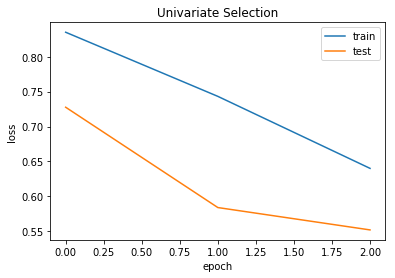

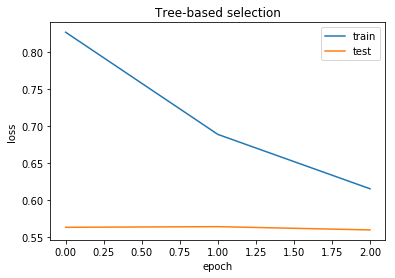

In [28]:
#Univariate Selection
#summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.title('Univariate Selection')
plt.show()

#Tree-based selection
# summarize history for loss
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.title('Tree-based selection')
plt.show()

In [29]:
#Univariate Selection
#Prediction on test set
predictions_NN_prob = NNmodel.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) 


#Tree-based selection
#Prediction on test set
predictions_NN_prob2 = NNmodel2.predict(X_test2)
predictions_NN_prob2 = predictions_NN_prob2[:,0]

predictions_NN_012 = np.where(predictions_NN_prob2 > 0.5, 1, 0)

In [30]:
#Univariate Selection
acc_NN = accuracy_score(y_test, predictions_NN_01)
print('Univariate Selection, Accuracy:', acc_NN)

#Tree-based selection
acc_NN2 = accuracy_score(y_test2, predictions_NN_012)
print('Tree-based selection, Accuracy:', acc_NN2)

Univariate Selection, Accuracy: 0.800524934383202
Tree-based selection, Accuracy: 0.7992125984251969


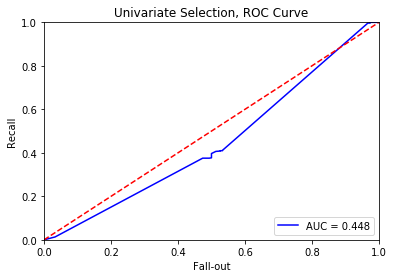

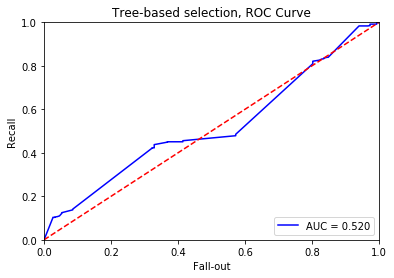

In [31]:
#Univariate Selection
#ROC Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Univariate Selection, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

#Tree-based selection
#ROC Curve
false_positive_rate2, recall2, thresholds2 = roc_curve(y_test2, predictions_NN_prob2)
roc_auc2 = auc(false_positive_rate2, recall2)
plt.figure()
plt.title('Tree-based selection, ROC Curve')
plt.plot(false_positive_rate2, recall2, 'b', label = 'AUC = %0.3f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

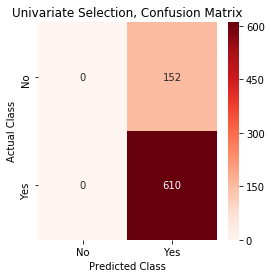

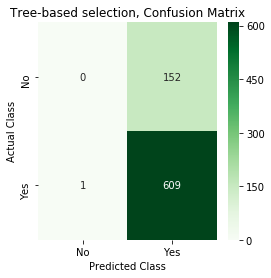

In [32]:
#Univariate Selection
#Confusion Matrix

cmatrix = confusion_matrix(y_test, predictions_NN_01)
labels = ['No', 'Yes']
plt.figure(figsize=(4,4))
sns.heatmap(cmatrix,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Reds", vmin = 0.3);
plt.title('Univariate Selection, Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#Tree-based selection
#Confusion Matrix
cmatrix2 = confusion_matrix(y_test2, predictions_NN_012)
labels = ['No', 'Yes']
plt.figure(figsize=(4,4))
sns.heatmap(cmatrix2,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Greens", vmin = 0.3);
plt.title('Tree-based selection, Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [33]:
#Univariate Selection
sensitivity = cmatrix[0,0]/(cmatrix[0,0]+cmatrix[0,1])

#Tree-based selection
sensitivity2 = cmatrix2[0,0]/(cmatrix2[0,0]+cmatrix2[0,1])

In [34]:
#Univariate Selection
specificity = cmatrix[1,1]/(cmatrix[1,0]+cmatrix[1,1])

#Tree-based selection
specificity2 = cmatrix2[1,1]/(cmatrix2[1,0]+cmatrix2[1,1])

In [35]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


#Univariate Selection
printmd("**Univariate Feature Selection**")
print('Accuracy: %.3f' %  acc_NN)
print('AUC Value: %.3f' % roc_auc)
print('Specificity: %.3f' %  specificity)
print('Sensitivity: %.3f' % sensitivity)

print('')
#Tree-based selection/Random Forest
printmd("**Tree-based or Random Forest Feature Selection**")
print('Accuracy: %.3f' %  acc_NN2)
print('AUC Value: %.3f' % roc_auc2)
print('Specificity: %.3f' %  specificity2)
print('Sensitivity: %.3f' % sensitivity2)

**Univariate Feature Selection**

Accuracy: 0.801
AUC Value: 0.448
Specificity: 1.000
Sensitivity: 0.000



**Tree-based or Random Forest Feature Selection**

Accuracy: 0.799
AUC Value: 0.520
Specificity: 0.998
Sensitivity: 0.000


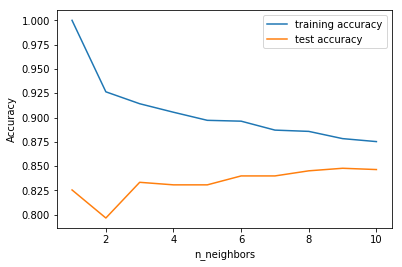

In [21]:
#k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.83


In [93]:
from sklearn.neighbors import KNeighborsClassifier
y_pred = knn.predict(X_test) 

In [98]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
knn_cr = classification_report(y_test, y_pred)
print(knn_cr)

[[ 63  89]
 [ 38 572]]
              precision    recall  f1-score   support

           0       0.62      0.41      0.50       152
           1       0.87      0.94      0.90       610

   micro avg       0.83      0.83      0.83       762
   macro avg       0.74      0.68      0.70       762
weighted avg       0.82      0.83      0.82       762



In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.870
Test set score: 0.843


In [24]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.870
Test set score: 0.843


In [77]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.871
Test set score: 0.841


In [99]:
y_pred1 = logreg001.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
lr_cr = classification_report(y_test, y_pred1)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.66      0.42      0.51       152
           1       0.87      0.95      0.91       610

   micro avg       0.84      0.84      0.84       762
   macro avg       0.76      0.68      0.71       762
weighted avg       0.83      0.84      0.83       762



In [27]:
#Descsion Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.856


In [28]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.870
Accuracy on test set: 0.845


In [101]:
y_pred2 = tree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
dt_cr = classification_report(y_test, y_pred2)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.72      0.36      0.48       152
           1       0.86      0.97      0.91       610

   micro avg       0.85      0.85      0.85       762
   macro avg       0.79      0.66      0.70       762
weighted avg       0.83      0.85      0.82       762



In [31]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.895


C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [105]:
y_pred3 = rf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
rm_cr = classification_report(y_test, y_pred3)
print(rm_cr)

              precision    recall  f1-score   support

           0       0.82      0.61      0.70       152
           1       0.91      0.97      0.94       610

   micro avg       0.90      0.90      0.90       762
   macro avg       0.86      0.79      0.82       762
weighted avg       0.89      0.90      0.89       762



In [35]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.960
Accuracy on test set: 0.894


In [36]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.863
Accuracy on test set: 0.853


In [37]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.861
Accuracy on test set: 0.850


In [106]:
y_pred4 = gb2.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
gb_cr = classification_report(y_test, y_pred4)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.97      0.26      0.41       152
           1       0.84      1.00      0.91       610

   micro avg       0.85      0.85      0.85       762
   macro avg       0.91      0.63      0.66       762
weighted avg       0.87      0.85      0.81       762



In [39]:
#Support Vector Machine
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 1.00
Accuracy on test set: 0.80


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.81
Accuracy on test set: 0.81


In [41]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.902
Accuracy on test set: 0.808


In [107]:
y_pred5 = svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
svm_cr = classification_report(y_test, y_pred5)
print(svm_cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.80      1.00      0.89       610

   micro avg       0.80      0.80      0.80       762
   macro avg       0.40      0.50      0.44       762
weighted avg       0.64      0.80      0.71       762



C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

print('')
#k-Nearest Neighbors
printmd("**k-Nearest Neighbors**")
print('Accuracy on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(knn.score(X_test, y_test)))
print('')
print(knn_cr) 


print('')
#Logistic Regression
printmd("**Logistic Regression**")
print("Accuracy on training set: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg001.score(X_test, y_test)))
print('')
print(lr_cr) 

print('')
#Decision Tree
printmd("**Decision Tree**")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print('')
print(dt_cr)

print('')
#Random Forest
printmd("**Random Forest**")
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))
print('')
print(rm_cr)

print('')
#Gradient Boosting
printmd("**Gradient Boosting**")
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))
print('')
print(gb_cr)

print('')
#Support Vector Machine
printmd("**Support Vector Machine**")
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))
print('')
print(svm_cr)

**k-Nearest Neighbors**

Accuracy on training set: 0.91
Accuracy on test set: 0.83

              precision    recall  f1-score   support

           0       0.62      0.41      0.50       152
           1       0.87      0.94      0.90       610

   micro avg       0.83      0.83      0.83       762
   macro avg       0.74      0.68      0.70       762
weighted avg       0.82      0.83      0.82       762




**Logistic Regression**

Accuracy on training set: 0.871
Accuracy on test set: 0.841

              precision    recall  f1-score   support

           0       0.66      0.42      0.51       152
           1       0.87      0.95      0.91       610

   micro avg       0.84      0.84      0.84       762
   macro avg       0.76      0.68      0.71       762
weighted avg       0.83      0.84      0.83       762




**Decision Tree**

Accuracy on training set: 0.870
Accuracy on test set: 0.845

              precision    recall  f1-score   support

           0       0.72      0.36      0.48       152
           1       0.86      0.97      0.91       610

   micro avg       0.85      0.85      0.85       762
   macro avg       0.79      0.66      0.70       762
weighted avg       0.83      0.85      0.82       762




**Random Forest**

Accuracy on training set: 0.998
Accuracy on test set: 0.895

              precision    recall  f1-score   support

           0       0.82      0.61      0.70       152
           1       0.91      0.97      0.94       610

   micro avg       0.90      0.90      0.90       762
   macro avg       0.86      0.79      0.82       762
weighted avg       0.89      0.90      0.89       762




**Gradient Boosting**

Accuracy on training set: 0.861
Accuracy on test set: 0.850

              precision    recall  f1-score   support

           0       0.97      0.26      0.41       152
           1       0.84      1.00      0.91       610

   micro avg       0.85      0.85      0.85       762
   macro avg       0.91      0.63      0.66       762
weighted avg       0.87      0.85      0.81       762




**Support Vector Machine**

Accuracy on training set: 0.902
Accuracy on test set: 0.808

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.80      1.00      0.89       610

   micro avg       0.80      0.80      0.80       762
   macro avg       0.40      0.50      0.44       762
weighted avg       0.64      0.80      0.71       762

